## **Zeroth-Order Optimization (ZOO) Attack and Binary Input Detector Using MNIST-10**

This notebook demonstrates the implementation of the Zoo attack using the Adversarial Robustness Toolbox (ART) against deep learning models trained on the MNIST-10 dataset. The tasks covered in this notebook are:

* Load the Required Libraries

* Load the Dataset and Inspect the Data

* Create a Deep Learning Model

* Train and Evaluate the Deep Learning Model on MNIST Test Data

* Implement ZOO Attack Using ART

* Create Adversarial Samples Using the Z00 Attack

* Evaluate the Deep Learning Model Against the Adversarial Samples

* Create a Detector Model to Detect Adversarial Samples

* Train and Evaluate the Detector Model

### **Zero-Order Optimization (ZOO) Attack - Overview**

The Zero-Order Optimization (ZOO) attack is a black-box adversarial attack introduced by Athalye, Carlini, and Wagner in 2018. This attack targets scenarios where the attacker has no access to the model's gradients or any internal information (such as architecture or weights). In contrast to attacks like FGSM or PGD, which rely on gradient information, ZOO uses zero-order optimization to generate adversarial examples by querying the model and using the output (e.g., class probabilities) to estimate gradients indirectly.

#### **Key Concepts**

**1. Black-box Attack**: The attacker only has access to the model’s outputs (e.g., logits or probabilities) for different inputs, without any access to the model's parameters, gradients, or internal structure.

**2. Zero-Order Optimization**: Instead of computing gradients directly, ZOO estimates the gradient using finite differences based on model queries. This is a numerical method where the gradient is approximated by observing how small changes to the input affect the output.

**3. Adversarial Example**: A perturbation of the input that is designed to make the model misclassify the input while keeping the perturbation imperceptible to humans.

#### **How Zero-Order Optimization (ZOO) Works**

The ZOO attack formulates the generation of adversarial examples as an optimization problem. The main goal is to find an input perturbation $δ$ that minimizes the loss or maximizes the misclassification score. This perturbation is computed using an optimization procedure, where the gradients are approximated using finite differences, i.e., by querying the model multiple times with perturbed inputs.
The ZOO Attack Formulation

#### **The ZOO attack optimizes the following objective function:**
$$L(x_{adv},x)=E[Loss(f(x_{adv}),y)]+λ⋅∥x_{adv}−x∥_{p}$$

Where:

* $x_{adv}$​ is the adversarial example.
* $x$ is the original input.
* $f(x_{adv})$ is the model's output for the adversarial input $x_{adv}$​.
* $y$ is the true label of the original input $x$.
* $λ$ is a regularization parameter that controls the trade-off between adversarial effectiveness and perturbation magnitude.
* $∥x_{adv}−x∥_{p}$​ is the perturbation magnitude, typically measured using the p-norm (e.g., $p=2$ for Euclidean distance).

The attack attempts to perturb $x$ to minimize this objective function, thus ensuring that the adversarial example $x_{adv}$​ causes the model to misclassify while maintaining a small perturbation.

#### **Step 1: Finite Difference Gradient Estimation**

Since we do not have direct access to the gradients of the model, we use finite differences to estimate the gradient. This involves querying the model multiple times with small perturbations and measuring how the outputs change in response.

For an input $x$ and a perturbation vector $δ$, the gradient estimate for a particular dimension $i$ of the input is given by:

$$\hat{∇}_{i}​=\frac{f(x + \epsilon e_i) - f(x - \epsilon e_i)}{2\epsilon}​$$

Where:

* $\hat{∇}_{i}$​ is the estimate of the gradient in the i-th direction.
* $f(x)$ is the model's output (e.g., class probability or logits) for the input $x$.
* $ϵ$ is a small perturbation (step size), and $e_{i}$​ is the unit vector along the $i$-th dimension of the input.
* The term $f(x+ϵei)$ represents the output of the model when the input $x$ is perturbed positively along the $i$-th axis by $ϵ$.
* The term $f(x−ϵei)$ represents the output of the model when the input $x$ is perturbed negatively along the $i$-th axis by $ϵ$.

#### **Step 2: Optimization Procedure**

Using these estimated gradients, the attack proceeds to optimize the perturbation $δ$ iteratively. The objective function for the optimization can be written as:
$$L(δ)=E[Loss(f(x+δ),y)]+λ⋅∥δ∥_{p}$$


Where:

* $δ$ is the perturbation that is being optimized.
* $f(x+δ)$ is the model’s output for the perturbed input $x+δ$.
* $λ$ controls the trade-off between minimizing the loss (misclassification) and minimizing the magnitude of the perturbation.
* The regularization term $∥δ∥_{p}$​ ensures that the perturbation is not too large and remains imperceptible to humans.

The optimization problem is solved using an iterative algorithm like L-BFGS or Adam, which adjusts $δ$ to minimize the objective function.

#### **Step 3: Querying and Perturbing the Input**

For each iteration, the following steps are performed:

**1. Perturb** the input $x$ by a small amount $δ$.

**2. Query the model** with the perturbed inputs $x+δ$ and $x−δ$.

**3. Estimate the gradient** using the finite difference method.

**4. Update the perturbation** $δ$ based on the gradient information to reduce the misclassification loss while controlling the perturbation size.

#### **Step 4: Generating the Adversarial Example**

The attack continues until the optimization converges, i.e., until the adversarial example $x_{adv}=x+δ$ successfully misclassifies the model or the perturbation reaches the desired magnitude.
Zero-Order Optimization (ZOO) Attack Process

**1. Initialize** the original input $x$ and true label $y$.

**2. Set the regularization parameter** $λ$ and perturbation size $ϵ$.

**3. Iterate** over the optimization procedure:
* Use finite differences to estimate the gradient for each dimension of the input.
* Update the perturbation $δ$ using an optimization algorithm (e.g., L-BFGS or Adam).

**4. Final adversarial example** $x_{adv}=x+δ$.

#### **Strengths and Weaknesses of ZOO**

**Strengths:**

* **Black-box Applicability**: ZOO is designed specifically for black-box attacks, where the attacker has no access to the model's internals (e.g., weights, gradients, architecture).
* **High Success Rate**: Despite being a black-box attack, ZOO is highly effective and can generate adversarial examples that successfully mislead the model.
* **Versatility**: ZOO can be applied to various models and tasks (e.g., classification, regression), as long as the attacker can query the model.

**Weaknesses:**

* **Query Intensive**: ZOO requires many queries to estimate the gradients, making it computationally expensive, especially for high-dimensional inputs such as images.
* **Slow Convergence**: The optimization may take time to converge, particularly when the perturbation space is large (e.g., for high-dimensional inputs such as images).
* **Dependence on Perturbation Size**: The success of ZOO heavily depends on the choice of $ϵ$ (perturbation size). A large ϵϵ might make the perturbation visible, while a small ϵϵ might not be sufficient to fool the model.

### Import and install required libaries

In [1]:
# Install prerequired libraries.
# !pip install adversarial-robustness-toolbox

In [1]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from keras.models import load_model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers.legacy import Adam

from art import config
from art.utils import load_dataset, get_file

from art.estimators.classification import KerasClassifier
from art.attacks.evasion import ZooAttack, BasicIterativeMethod
from art.defences.detector.evasion import BinaryInputDetector
from art.defences.trainer import AdversarialTrainer

2025-01-14 15:46:10.135934: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-14 15:46:10.237941: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
# Specifying the GPU
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.set_visible_devices(gpus[2], 'GPU')
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)

3 Physical GPUs, 1 Logical GPU


2025-01-14 15:46:27.604287: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-14 15:46:28.017951: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 618 MB memory:  -> device: 2, name: Quadro RTX 8000, pci bus id: 0000:73:00.0, compute capability: 7.5


### Load MNIST dataset

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# (x_train, y_train), (x_test, y_test) = np.load('./../datasets/mnist10_dataset.npy', allow_pickle = True)
x_train, x_test = x_train / 255.0, x_test / 255.0
min = x_train.min()
max = x_train.max()

x_train.shape, y_train.shape, x_test.shape, y_test.shape, min, max

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,), 0.0, 1.0)



Have a look at the data!


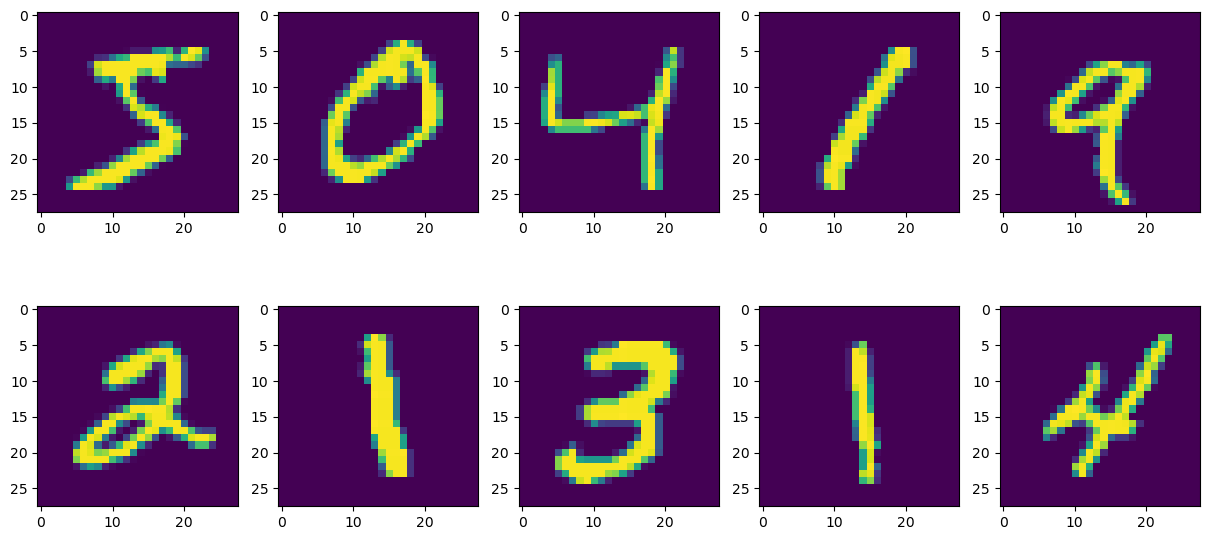

In [4]:
fig, ax = plt.subplots(2,5, figsize=(15, 7))
ax = ax.flatten()

for i, (image, label) in enumerate(zip(x_train[:10], y_train[:10])):
  #im_idx = np.argwhere(y_train == i)[0]
  ax[i].imshow(image)
  # ax[i].set_title(f"Label: {label.argmax()}",  fontsize=12)

In [5]:
nb_classes =10
y_test = tf.keras.utils.to_categorical(y_test, num_classes=nb_classes)
x_test = np.expand_dims(x_test, axis=-1)

y_train = tf.keras.utils.to_categorical(y_train, num_classes=nb_classes)
x_train = np.expand_dims(x_train, axis=-1)

In [6]:
y_test.shape, y_train.shape

((10000, 10), (60000, 10))

# **Training Model**

**Load a pretrained model**

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', strides = 1),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides = 2),
    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu', strides = 1),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides = 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']);

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 128)        0

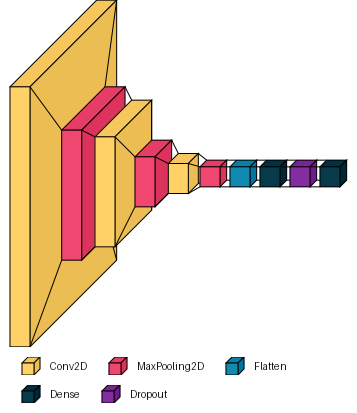

In [10]:
# import visualkeras
# visualkeras.layered_view(model, scale_xy=10, legend=True)

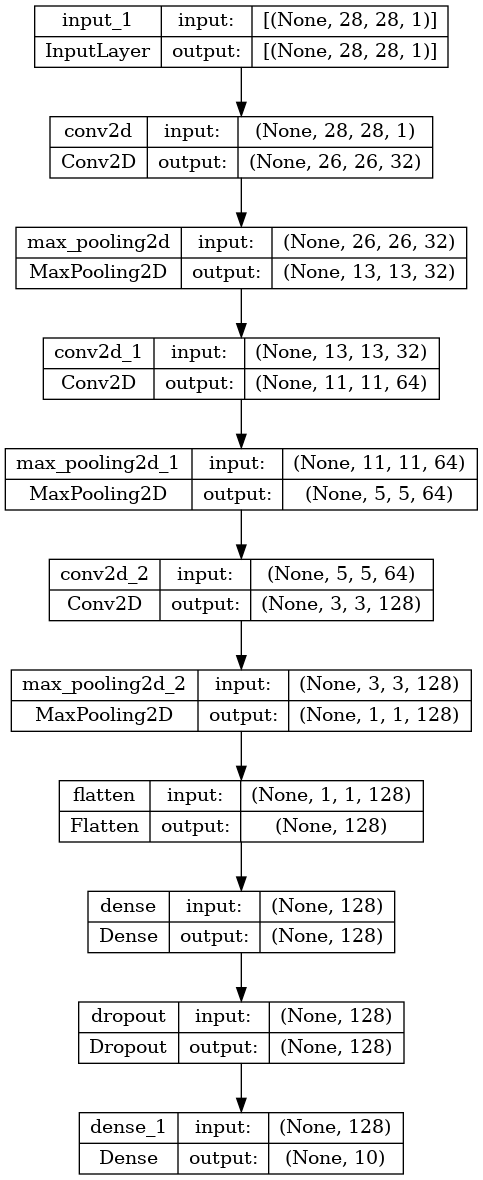

In [9]:
tf.keras.utils.plot_model(model, show_shapes=True)

### Fit the model on training data.

In [11]:
# history = model.fit(x_train, y_train, epochs = 5)
model = tf.keras.models.load_model('./../Models/mnist10_conv.keras')

2025-01-14 15:47:43.913932: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 618 MB memory:  -> device: 2, name: Quadro RTX 8000, pci bus id: 0000:73:00.0, compute capability: 7.5
2025-01-14 15:47:44.055611: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:357] MLIR V1 optimization pass is not enabled
2025-01-14 15:47:44.178675: W tensorflow/c/c_api.cc:291] Operation '{name:'dense_1_1/kernel/Assign' id:338 op device:{requested: '', assigned: ''} def:{{{node dense_1_1/kernel/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](dense_1_1/kernel, dense_1_1/kernel/Initializer/stateless_random_uniform)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2025-01-14 15:47:44.516238: W tensorflow/c/c_ap

#### Evaluate model accuracy on test data.

In [12]:
loss_test, accuracy_test = model.evaluate(x_test, y_test)
print('Accuracy on test data: {:4.2f}%'.format(accuracy_test * 100))

2025-01-14 15:47:48.076842: W tensorflow/c/c_api.cc:291] Operation '{name:'loss_1/mul' id:478 op device:{requested: '', assigned: ''} def:{{{node loss_1/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss_1/mul/x, loss_1/dense_1_loss/value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2025-01-14 15:47:48.254085: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8902


Accuracy on test data: 98.57%


In [13]:
x_test_pred = np.argmax(model.predict(x_test), axis = 1)
nb_correct_pred = np.sum(x_test_pred == np.argmax(y_test, axis = 1))

print('Original test Data: ')
print('Correctly Classified: {}'.format(nb_correct_pred))
print('Incorrectly Classified: {}'.format(len(x_test) - nb_correct_pred))

2025-01-14 15:47:58.174910: W tensorflow/c/c_api.cc:291] Operation '{name:'dense_1_1/Softmax' id:349 op device:{requested: '', assigned: ''} def:{{{node dense_1_1/Softmax}} = Softmax[T=DT_FLOAT, _has_manual_control_dependencies=true](dense_1_1/BiasAdd)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Original test Data: 
Correctly Classified: 9857
Incorrectly Classified: 143


In [18]:
x_test = x_test[0:100]
y_test = y_test[0:100]

In [19]:
classifier = KerasClassifier(model=model, clip_values=(0.0, 1.0))

### **Zeroth-Order Optimization (ZOO) Attack**

> class art.attacks.evasion.ZooAttack(classifier: CLASSIFIER_TYPE, confidence: float = 0.0, targeted: bool = False, learning_rate: float = 0.01, max_iter: int = 10, binary_search_steps: int = 1, initial_const: float = 0.001, abort_early: bool = True, use_resize: bool = True, use_importance: bool = True, nb_parallel: int = 128, batch_size: int = 1, variable_h: float = 0.0001, verbose: bool = True)

The black-box zeroth-order optimization attack from Pin-Yu Chen et al. (2018). This attack is a variant of the C&W attack which uses ADAM coordinate descent to perform numerical estimation of gradients.
* Paper link: https://arxiv.org/abs/1708.03999

*__init__(classifier: CLASSIFIER_TYPE, confidence: float = 0.0, targeted: bool = False, learning_rate: float = 0.01, max_iter: int = 10, binary_search_steps: int = 1, initial_const: float = 0.001, abort_early: bool = True, use_resize: bool = True, use_importance: bool = True, nb_parallel: int = 128, batch_size: int = 1, variable_h: float = 0.0001, verbose: bool = True)*

**Create a ZOO attack instance.**

**Parameters**

* classifier – A trained classifier.
* confidence (float) – Confidence of adversarial examples: a higher value produces examples that are farther away, from the original input, but classified with higher confidence as the target class.
* targeted (bool) – Should the attack target one specific class.
* learning_rate (float) – The initial learning rate for the attack algorithm. Smaller values produce better results but are slower to converge.
* max_iter (int) – The maximum number of iterations.
* binary_search_steps (int) – Number of times to adjust constant with binary search (positive value).
* initial_const (float) – The initial trade-off constant c to use to tune the relative importance of distance and confidence. If binary_search_steps is large, the initial constant is not important, as discussed in Carlini and Wagner (2016).
* abort_early (bool) – True if gradient descent should be abandoned when it gets stuck.
* use_resize (bool) – True if to use the resizing strategy from the paper: first, compute attack on inputs resized to 32x32, then increase size if needed to 64x64, followed by 128x128.
* use_importance (bool) – True if to use importance sampling when choosing coordinates to update.
* nb_parallel (int) – Number of coordinate updates to run in parallel. A higher value for nb_parallel should be preferred over a large batch size.
* batch_size (int) – Internal size of batches on which adversarial samples are generated. Small batch sizes are encouraged for ZOO, as the algorithm already runs nb_parallel coordinate updates in parallel for each sample. The batch size is a multiplier of nb_parallel in terms of memory consumption.
* variable_h (float) – Step size for numerical estimation of derivatives.
* verbose (bool) – Show progress bars.

> generate(x: ndarray, y: Optional[ndarray] = None, **kwargs) → ndarray

**Generate adversarial samples and return them in an array.**

**Return type**
* ndarray

**Parameters**
* x (ndarray) – An array with the original inputs to be attacked.
* y – Target values (class labels) one-hot-encoded of shape (nb_samples, nb_classes) or indices of shape (nb_samples,).

**Returns**
* An array holding the adversarial examples.

**Link**
documetation: https://adversarial-robustness-toolbox.readthedocs.io/en/latest/modules/attacks/evasion.html#zeroth-order-optimization-zoo-attack
github: https://github.com/Trusted-AI/adversarial-robustness-toolbox/blob/main/art/attacks/evasion/zoo.py

### Create an ART ZOO attack.

In [20]:
attack_zoo = ZooAttack(classifier = classifier,
                       learning_rate=1.0,
                       targeted = False,
                       max_iter = 500,
                       verbose = True, 
                       batch_size=32, 
                       nb_parallel=32)

#### Generate adversarial test data.

In [22]:
# x_test_adv = attack_zoo.generate(x_test, y=y_test)
np.savez('./ZOO_data/ZOO_generated_mnist_test_data.npz', x_test_adv = x_test_adv, y_test = y_test)
test_data = np.load('./ZOO_data/ZOO_generated_mnist_test_data.npz')
x_test_adv, y_test = test_data['x_test_adv'], test_data['y_test']
x_test_adv.shape, y_test.shape

((100, 28, 28, 1), (100, 10))

Visualise the first adversarial test sample.

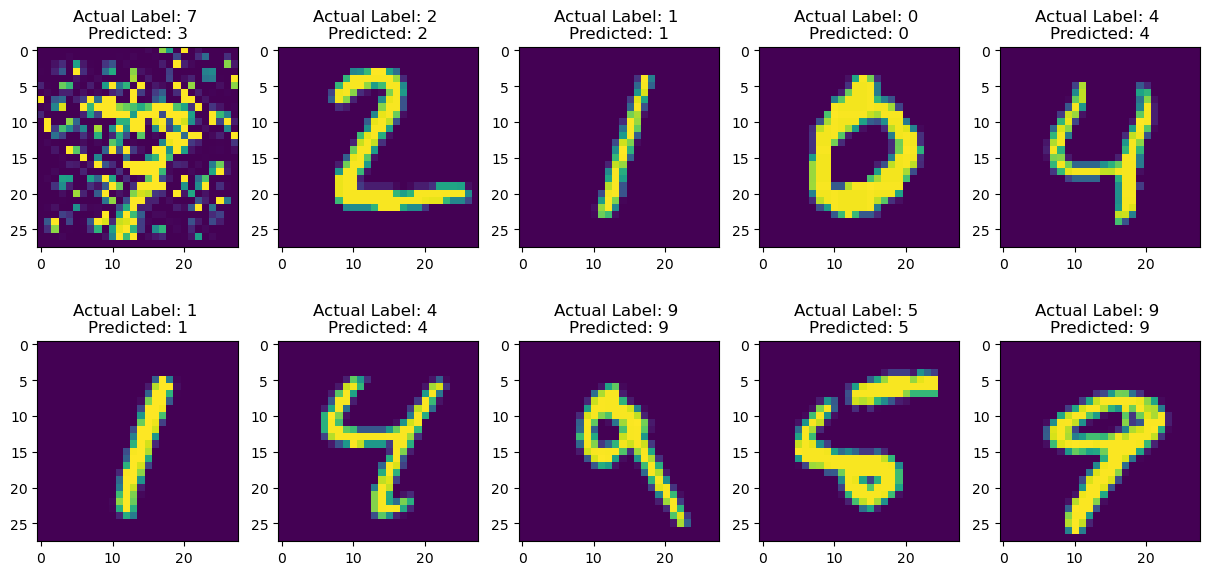

In [23]:
fig, ax = plt.subplots(2,5, figsize=(15, 7))
ax = ax.flatten()


for i, (image, label) in enumerate(zip(x_test_adv[:10], y_test[:10])):
  #im_idx = np.argwhere(y_train == i)[0]
  ax[i].imshow(image)
  ax[i].set_title(f"Actual Label: {label.argmax()} \nPredicted: {classifier.predict(np.expand_dims(image, axis=0)).argmax()}",  fontsize=12)


#### Evaluate the trained model

In [24]:
loss_test, accuracy_test = model.evaluate(x_test_adv, y_test)
perturbation = np.mean(np.abs((x_test_adv - x_test)))
print('Accuracy on adversarial test data: {:4.2f}%'.format(accuracy_test * 100))
print('Average perturbation: {:4.2f}'.format(perturbation))

Accuracy on adversarial test data: 99.00%
Average perturbation: 0.00


Training the Detector

We create the second model using Keras API with the same strucure of the classifier. Here we use the Keras Sequential model and add a sequence of layers. Afterwards the model is compiles with optimizer, loss function and metrics. This model will be used to classify between ordinary samples and perturbated ones

In [25]:
detector_model = tf.keras.models.Sequential([
    # tf.keras.layers.InputLayer(input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', strides = 1),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides = 2),
    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu', strides = 1),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides = 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation='softmax')
])

detector_model.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy']);

#### Generate Adversarial samples for training the detector model. 

In [44]:
# Generating adversarail training data is time taking process. 
# So, we have decreased the number of samples to 500 to save time, 
# if you do not want to generate yourself, we have the saved data for your in the next chunk of cells. 
x_train_adv = attack_zoo.generate(x_train[:500])
nb_train = x_train[:500].shape[0]

x_train_detector = np.concatenate((x_train[:500], x_train_adv), axis=0)
y_train_detector = np.concatenate((np.array([[1,0]]*nb_train), np.array([[0,1]]*nb_train)), axis=0)

In [23]:
# np.savez('./ZOO_data/ZOO_generated_mnist_detector.npz', x_train_detector = x_train_detector, y_train_detector = y_train_detector)
detector_data = np.load('./ZOO_data/ZOO_generated_mnist_detector.npz')
x_train_detector, y_train_detector = detector_data['x_train_detector'], detector_data['y_train_detector']
x_train_detector.shape, y_train_detector.shape

((1000, 28, 28, 1), (1000, 2))

Note: the robust classifier has the same architecture as above, except the first dense layer has 1024 instead of 128 units. (This was recommend by Madry et al. (2017), Towards Deep Learning Models Resistant to Adversarial Attacks)

In [24]:
detector_model.fit(x_train_detector, y_train_detector, epochs=10)

Train on 1000 samples
Epoch 1/10
  32/1000 [..............................] - ETA: 2s - loss: 0.7012 - accuracy: 0.5312

2024-05-29 19:43:44.204343: W tensorflow/c/c_api.cc:291] Operation '{name:'training_2/Adam/dense_4/kernel/v/Assign' id:1258 op device:{requested: '', assigned: ''} def:{{{node training_2/Adam/dense_4/kernel/v/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training_2/Adam/dense_4/kernel/v, training_2/Adam/dense_4/kernel/v/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


1000/1000 [==============================] - 0s 270us/sample - loss: 0.6993 - accuracy: 0.5050
Epoch 2/10
1000/1000 [==============================] - 0s 92us/sample - loss: 0.6920 - accuracy: 0.5110
Epoch 3/10
1000/1000 [==============================] - 0s 78us/sample - loss: 0.6727 - accuracy: 0.5540
Epoch 4/10
1000/1000 [==============================] - 0s 89us/sample - loss: 0.6528 - accuracy: 0.5920
Epoch 5/10
1000/1000 [==============================] - 0s 78us/sample - loss: 0.6243 - accuracy: 0.6070
Epoch 6/10
1000/1000 [==============================] - 0s 81us/sample - loss: 0.6141 - accuracy: 0.6030
Epoch 7/10
1000/1000 [==============================] - 0s 80us/sample - loss: 0.6114 - accuracy: 0.6030
Epoch 8/10
1000/1000 [==============================] - 0s 77us/sample - loss: 0.6061 - accuracy: 0.6170
Epoch 9/10
1000/1000 [==============================] - 0s 74us/sample - loss: 0.6064 - accuracy: 0.6140
Epoch 10/10
1000/1000 [==============================] - 0s 76us/

#### Evaluate the adversarial generated data

In [25]:
x_test = x_test[:100]
nb_test = x_test.shape[0]

x_test_detector = np.concatenate((x_test, x_test_adv), axis=0)
y_test_detector = np.concatenate((np.array([[1,0]]*nb_test), np.array([[0,1]]*nb_test)), axis=0)

In [26]:
loss_test, accuracy_test = detector_model.evaluate(x_test_detector, y_test_detector)
print('Accuracy on test data: {:4.2f}%'.format(accuracy_test * 100))

Accuracy on test data: 63.50%


2024-05-29 19:45:11.639991: W tensorflow/c/c_api.cc:291] Operation '{name:'loss_2/mul' id:1053 op device:{requested: '', assigned: ''} def:{{{node loss_2/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss_2/mul/x, loss_2/dense_5_loss/value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


In [27]:
detector_classifier = KerasClassifier(clip_values=(0.0, 0.1), model=detector_model, use_logits=False)
detector = BinaryInputDetector(detector_classifier)

In [28]:
detector.fit(x_train_detector, y_train_detector, nb_epochs=3, batch_size=32)

### Evaluating the detector

Apply the detector to the adversarial test data:

In [29]:
_, is_adversarial = detector.detect(x_test_adv)
flag_adv = np.sum(is_adversarial)

print("Adversarial test data (first 100 images):")
print("Flagged: {}".format(flag_adv))
print("Not flagged: {}".format(100 - flag_adv))

Adversarial test data (first 100 images):
Flagged: 24
Not flagged: 76


2024-05-29 19:45:58.816622: W tensorflow/c/c_api.cc:291] Operation '{name:'dense_5/Softmax' id:977 op device:{requested: '', assigned: ''} def:{{{node dense_5/Softmax}} = Softmax[T=DT_FLOAT, _has_manual_control_dependencies=true](dense_5/BiasAdd)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Apply the detector to the first 100 original test images:

In [30]:
_, is_adversarial = detector.detect(x_test)
flag_original = np.sum(is_adversarial)

print("Original test data (first 100 images):")
print("Flagged: {}".format(flag_original))
print("Not flagged: {}".format(100 - flag_original))

Original test data (first 100 images):
Flagged: 0
Not flagged: 100


Evaluate the robust classifier's performance on the adversarial test data (black-box setting):

In [34]:
learning_rate = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3]
nb_flag_adv = []
nb_missclass = []


attack_zoo.set_params(**{'max_iter' : 10})

for rate in learning_rate:
    attack_zoo.set_params(**{'learning_rate': rate})
    x_test_adv = attack_zoo.generate(x_test[:100])
    nb_flag_adv += [np.sum(detector.detect(x_test_adv)[1])]
    nb_missclass += [np.sum(np.argmax(classifier.predict(x_test_adv), axis=1) != np.argmax(y_test[:100], axis=1))]

learning_range = [0] + learning_rate
nb_flag_adv = [flag_original] + nb_flag_adv
nb_missclass = [2] + nb_missclass

ZOO:   0%|          | 0/4 [00:00<?, ?it/s]

ZOO:   0%|          | 0/4 [00:00<?, ?it/s]

ZOO:   0%|          | 0/4 [00:00<?, ?it/s]

ZOO:   0%|          | 0/4 [00:00<?, ?it/s]

ZOO:   0%|          | 0/4 [00:00<?, ?it/s]

ZOO:   0%|          | 0/4 [00:00<?, ?it/s]

ZOO:   0%|          | 0/4 [00:00<?, ?it/s]

ZOO:   0%|          | 0/4 [00:00<?, ?it/s]

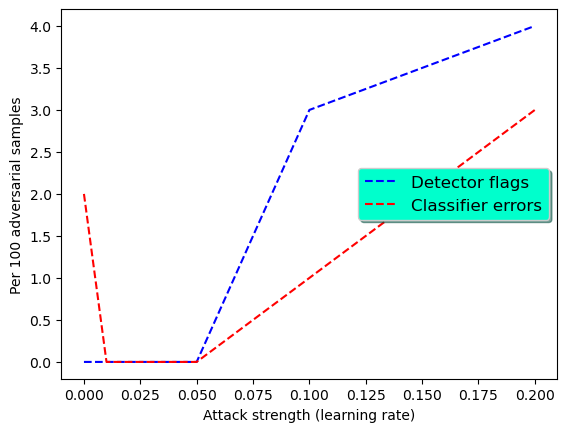

In [35]:
fig, ax = plt.subplots()
ax.plot(np.array(learning_range)[:8], np.array(nb_flag_adv)[:8], 'b--', label='Detector flags')
ax.plot(np.array(learning_range)[:8], np.array(nb_missclass)[:8], 'r--', label='Classifier errors')

legend = ax.legend(loc='center right', shadow=True, fontsize='large')
legend.get_frame().set_facecolor('#00FFCC')

plt.xlabel('Attack strength (learning rate)')
plt.ylabel('Per 100 adversarial samples')
plt.show()

Evaluate the adversarial generated data

### **Summary**


#### Zeroth-Order Optimization (ZOO) Attack and Binary Input Detector Using MNIST-10

This notebook demonstrates the implementation of the ZOO attack using the Adversarial Robustness Toolbox (ART) against deep learning models trained on the MNIST-10 dataset. The tasks covered include:

1. **Load the Required Libraries:** Import necessary Python libraries and modules, including TensorFlow/Keras and ART.
2. **Load the Dataset and Inspect the Data:** Load and visualize the MNIST-10 dataset of handwritten digits (0-9).
3. **Create a Deep Learning Model:** Construct a CNN to classify MNIST-10 digits, including convolutional, pooling, and fully connected layers.
4. **Train and Evaluate the Model:** Train the CNN on MNIST-10 and evaluate its baseline accuracy on test data.
5. **Implement ZOO Attack Using ART:** The Zeroth Order Optimization (ZOO) attack is notable for its effectiveness in black-box settings, where only the model's output is accessible.
6. **Create Adversarial Samples Using ZOO:** Generate adversarial examples from the test images using ZOO and visually inspect them.
7. **Evaluate Against Adversarial Samples:** Test the model's robustness by evaluating its accuracy on the adversarial samples.
8. **Create a Detector Model:** Develop a binary classifier to detect adversarial inputs by differentiating between original and adversarial images.
9. **Train and Evaluate the Detector:** Train the detector using a labeled dataset of original and adversarial samples, and evaluate its accuracy in identifying adversarial attacks.

This summary highlights the process and key tasks involved in implementing the ZOO attack and developing a binary input detector using the MNIST-10 dataset, illustrating the importance of adversarial defenses in machine learning.